In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [2]:
# Global variables
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
# DEFINE FUNCTIONS
# Import raw sensor data from .csv files
def import_csv(fn):
    data = pd.read_csv(fn)
    data.columns = ['time', 'action_type_id', 'action_test_num', 'action_time', 'acc_x', 'acc_y', 'acc_z', 'mag_x', 'mag_y', 'mag_z', 'gyro_x', 'gyro_y', 'gyro_z']
    data.set_index('time')
    return data

In [4]:
# Calculate Dynamic Time Warping distances
def calc_dtw(df, sensor):
    y1 = sensor + '_x'
    y2 = sensor + '_y'
    y3 = sensor + '_z'
    dists = []
    x_dists = []
    y_dists = []
    z_dists = []
    
    for j in range(1,101):
        d1 = df.loc[data['action_test_num'] == j]
        for i in [x for x in range(j,101) if x != j]:
            try:
                d2 = df.loc[data['action_test_num'] == i]
                dx, px = fastdtw(d1[['action_time',y1]], d2[['action_time', y1]], dist=euclidean)
                dy, py = fastdtw(d1[['action_time',y2]], d2[['action_time', y2]], dist=euclidean)
                dz, pz = fastdtw(d1[['action_time',y3]], d2[['action_time', y3]], dist=euclidean)
            except:
                # print(i)
                pass

            x_dists.append(dx)
            y_dists.append(dy)
            z_dists.append(dz)


    dists.append(x_dists)
    dists.append(y_dists)
    dists.append(z_dists)
    return dists

In [5]:
# Import raw sensor data
dfSlap = import_csv("training/slap_data.csv")
dfWrist = import_csv("training/wrist_data.csv")
dfSnap = import_csv("training/snap_data.csv")
dfPass = import_csv("training/pass_data.csv")
dfHandling = import_csv("training/stick_handling_data.csv")
dfWalk = import_csv("training/walking_data.csv")
dfBench = import_csv("training/bench_data.csv")

In [6]:
# Read DTW distance data for sensors
slap_accd = pd.read_csv('dtw/slap_accd.csv').values.tolist()
slap_magd = pd.read_csv('dtw/slap_magd.csv').values.tolist()
slap_gyrod = pd.read_csv('dtw/slap_gyrod.csv').values.tolist()

wrist_accd = pd.read_csv('dtw/wrist_accd.csv').values.tolist()
wrist_magd = pd.read_csv('dtw/wrist_magd.csv').values.tolist()
wrist_gyrod = pd.read_csv('dtw/wrist_gyrod.csv').values.tolist()


handling_accd = pd.read_csv('dtw/handling_accd.csv').values.tolist()
handling_magd = pd.read_csv('dtw/handling_magd.csv').values.tolist()
handling_gyrod = pd.read_csv('dtw/handling_gyrod.csv').values.tolist()

bench_accd = pd.read_csv('dtw/bench_accd.csv').values.tolist()
bench_magd = pd.read_csv('dtw/bench_magd.csv').values.tolist()
bench_gyrod = pd.read_csv('dtw/bench_gyrod.csv').values.tolist()

In [7]:
# Find centroids
slap_accc = [np.average(slap_accd[0]), np.average(slap_accd[1]), np.average(slap_accd[2])]
slap_magc = [np.average(slap_magd[0]), np.average(slap_magd[1]), np.average(slap_magd[2])]
slap_gyroc = [np.average(slap_gyrod[0]), np.average(slap_gyrod[1]), np.average(slap_gyrod[2])]

wrist_accc = [np.average(wrist_accd[0]), np.average(wrist_accd[1]), np.average(wrist_accd[2])]
wrist_magc = [np.average(wrist_magd[0]), np.average(wrist_magd[1]), np.average(wrist_magd[2])]
wrist_gyroc = [np.average(wrist_gyrod[0]), np.average(wrist_gyrod[1]), np.average(wrist_gyrod[2])]

handling_accc = [np.average(handling_accd[0]), np.average(handling_accd[1]), np.average(handling_accd[2])]
handling_magc = [np.average(handling_magd[0]), np.average(handling_magd[1]), np.average(handling_magd[2])]
handling_gyroc = [np.average(handling_gyrod[0]), np.average(handling_gyrod[1]), np.average(handling_gyrod[2])]

bench_accc = [np.average(bench_accd[0]), np.average(bench_accd[1]), np.average(bench_accd[2])]
bench_magc = [np.average(bench_magd[0]), np.average(bench_magd[1]), np.average(bench_magd[2])]
bench_gyroc = [np.average(bench_gyrod[0]), np.average(bench_gyrod[1]), np.average(bench_gyrod[2])]

# Find std dev
slap_accstd = [np.std(slap_accd[0]), np.std(slap_accd[1]), np.std(slap_accd[2])]
slap_magstd = [np.std(slap_magd[0]), np.std(slap_magd[1]), np.std(slap_magd[2])]
slap_gyrostd = [np.std(slap_gyrod[0]), np.std(slap_gyrod[1]), np.std(slap_gyrod[2])]

wrist_accstd = [np.std(wrist_accd[0]), np.std(wrist_accd[1]), np.std(wrist_accd[2])]
wrist_magstd = [np.std(wrist_magd[0]), np.std(wrist_magd[1]), np.std(wrist_magd[2])]
wrist_gyrostd = [np.std(wrist_gyrod[0]), np.std(wrist_gyrod[1]), np.std(wrist_gyrod[2])]

handling_accstd = [np.std(handling_accd[0]), np.std(handling_accd[1]), np.std(handling_accd[2])]
handling_magstd = [np.std(handling_magd[0]), np.std(handling_magd[1]), np.std(handling_magd[2])]
handling_gyrostd = [np.std(handling_gyrod[0]), np.std(handling_gyrod[1]), np.std(handling_gyrod[2])]

bench_accstd = [np.std(bench_accd[0]), np.std(bench_accd[1]), np.std(bench_accd[2])]
bench_magstd = [np.std(bench_magd[0]), np.std(bench_magd[1]), np.std(bench_magd[2])]
bench_gyrostd = [np.std(bench_gyrod[0]), np.std(bench_gyrod[1]), np.std(bench_gyrod[2])]

Text(0.5, 1.0, 'DTW Avg Dist Acc: z vs y')

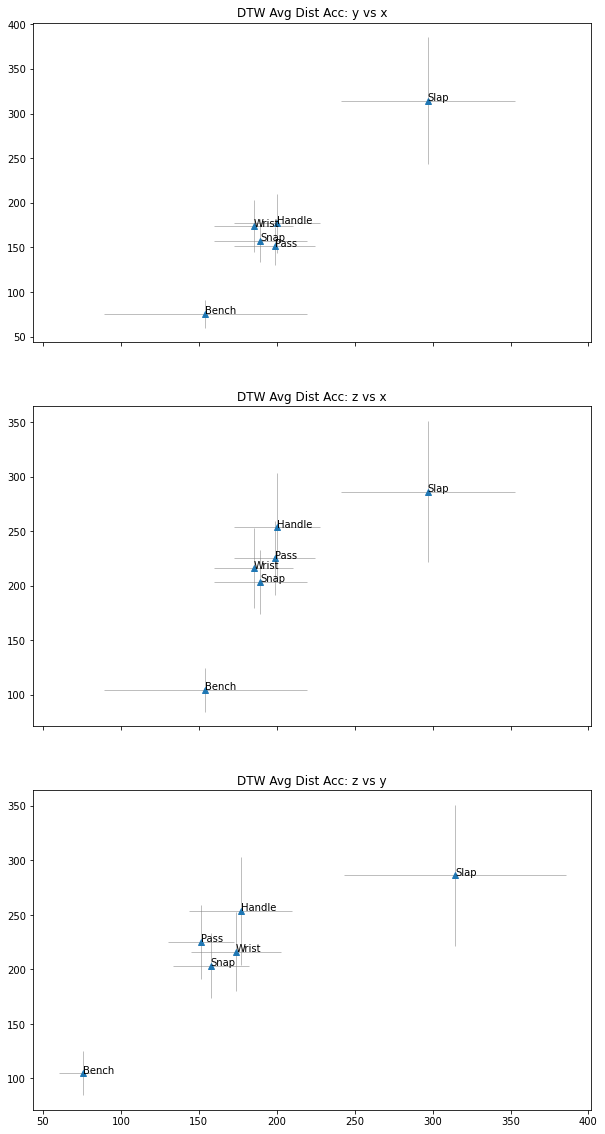

In [8]:
# Accel - Average DTW distances with std deviation error bars
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [296.885344472, 185.283643352, 189.509664995, 198.699449987, 200.421394047, 154.316690767]
y = [314.451266221, 173.886732908, 157.752505509, 151.474020508, 176.935479231, 75.8355939795]
z = [286.327011971, 216.22233165, 203.52353992, 225.31302684, 253.681575502, 104.694019017]

xe = [55.8889729289, 25.3882392023, 29.7828723276, 25.9599173663, 27.5550359553, 64.9143597257]
ye = [71.0492864007, 28.7460799794, 24.5173211046, 21.4007640588, 33.0497047153, 15.7742642537]
ze = [64.8584622691, 36.3874004185, 29.5556739355, 33.7194886052, 49.6209319772, 20.1037836492]

ax = axs[0]
ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], y[0]))
ax.annotate('Wrist', (x[1], y[1]))
ax.annotate('Snap', (x[2], y[2]))
ax.annotate('Pass', (x[3], y[3]))
ax.annotate('Handle', (x[4], y[4]))
ax.annotate('Bench', (x[5], y[5]))
ax.set_title('DTW Avg Dist Acc: y vs x')


ax = axs[1]
ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], z[0]))
ax.annotate('Wrist', (x[1], z[1]))
ax.annotate('Snap', (x[2], z[2]))
ax.annotate('Pass', (x[3], z[3]))
ax.annotate('Handle', (x[4], z[4]))
ax.annotate('Bench', (x[5], z[5]))
ax.set_title('DTW Avg Dist Acc: z vs x')


ax = axs[2]
ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (y[0], z[0]))
ax.annotate('Wrist', (y[1], z[1]))
ax.annotate('Snap', (y[2], z[2]))
ax.annotate('Pass', (y[3], z[3]))
ax.annotate('Handle', (y[4], z[4]))
ax.annotate('Bench', (y[5], z[5]))
ax.set_title('DTW Avg Dist Acc: z vs y')


Text(0.5, 1.0, 'DTW Avg Dist Mag: z vs y')

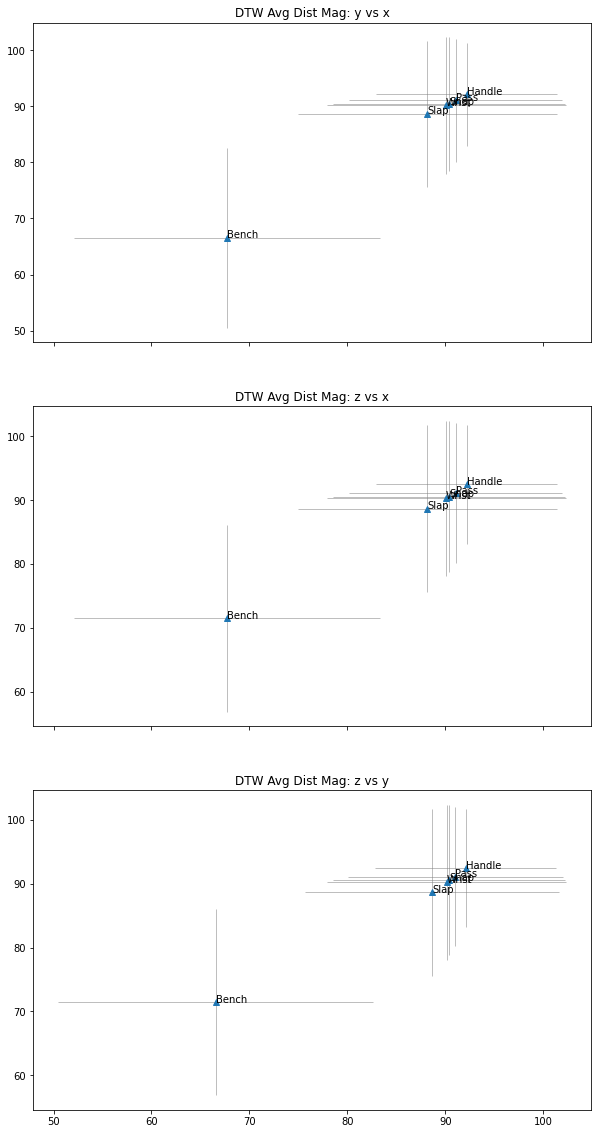

In [9]:
# Mag - Average DTW distances with std deviation error bars
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [88.1812421412, 90.0947846811, 90.4164984252, 91.0830848188, 92.1751919404, 67.6897334413]
y = [88.6510047592, 90.1324777532, 90.3835783533, 91.0349150487, 92.0869045294, 66.5561829795]
z = [88.6380563491, 90.2311615984, 90.5268099316, 91.0812005599, 92.4304549835, 71.4918972148]

xe = [13.2462932971, 12.2015232721, 11.8576933492, 10.894908586, 9.26438237936, 15.6191436621]
ye = [12.9889571869, 12.1746447202, 11.8631578601, 10.9466499706, 9.25509727711, 16.0599626249]
ze = [13.0373964599, 12.1365008746, 11.7519863095, 10.8964233776, 9.29160347514, 14.6016808767]

ax = axs[0]
ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], y[0]))
ax.annotate('Wrist', (x[1], y[1]))
ax.annotate('Snap', (x[2], y[2]))
ax.annotate('Pass', (x[3], y[3]))
ax.annotate('Handle', (x[4], y[4]))
ax.annotate('Bench', (x[5], y[5]))
ax.set_title('DTW Avg Dist Mag: y vs x')

ax = axs[1]
ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], z[0]))
ax.annotate('Wrist', (x[1], z[1]))
ax.annotate('Snap', (x[2], z[2]))
ax.annotate('Pass', (x[3], z[3]))
ax.annotate('Handle', (x[4], z[4]))
ax.annotate('Bench', (x[5], z[5]))
ax.set_title('DTW Avg Dist Mag: z vs x')

ax = axs[2]
ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (y[0], z[0]))
ax.annotate('Wrist', (y[1], z[1]))
ax.annotate('Snap', (y[2], z[2]))
ax.annotate('Pass', (y[3], z[3]))
ax.annotate('Handle', (y[4], z[4]))
ax.annotate('Bench', (y[5], z[5]))
ax.set_title('DTW Avg Dist Mag: z vs y')

Text(0.5, 1.0, 'DTW Avg Dist Gyro: z vs y')

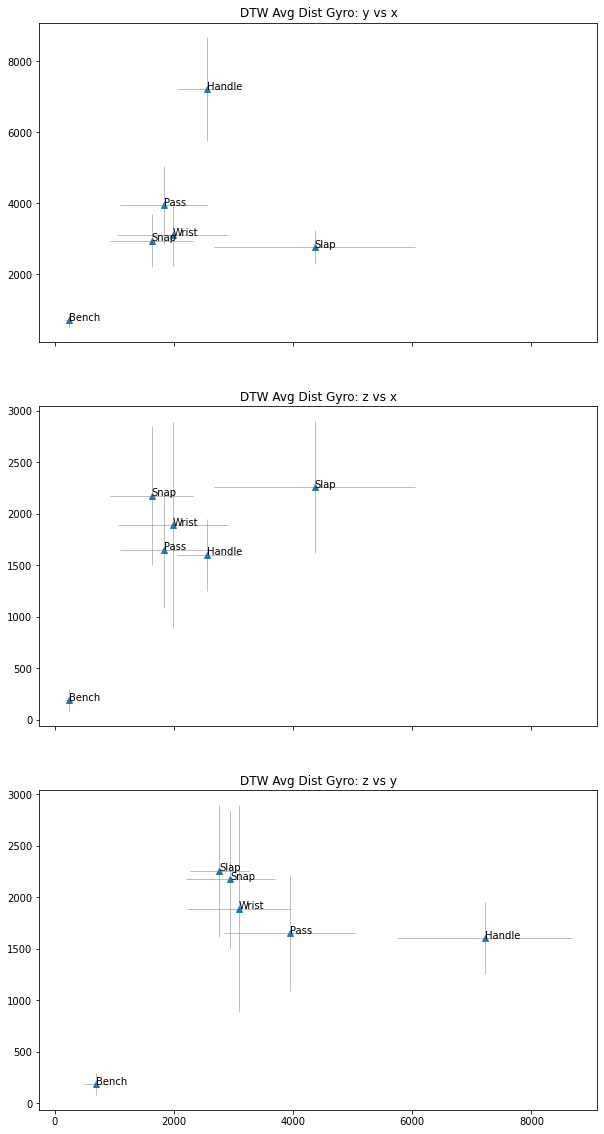

In [10]:
# Gyro - Average DTW distances with std deviation error bars
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [4364.34847265, 1987.71063837, 1628.48456173, 1828.31607674, 2563.37940886, 233.706930386]
y = [2766.17071416, 3093.80113002, 2949.93415441, 3943.92387908, 7215.88688941, 700.588770031]
z = [2256.96073245, 1889.40127619, 2172.84530081, 1649.96281993, 1600.5769395, 187.198107337]

xe = [1681.62626327, 918.933239101, 692.379171417, 737.783852836, 514.035309836, 61.901543808]
ye = [488.858451691, 873.622182684, 745.163434787, 1097.57506791, 1465.97957285, 210.134378077]
ze = [642.695385322, 1002.9262689, 675.973553162, 563.143692319, 349.193909939, 108.139025129]

ax = axs[0]
ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], y[0]))
ax.annotate('Wrist', (x[1], y[1]))
ax.annotate('Snap', (x[2], y[2]))
ax.annotate('Pass', (x[3], y[3]))
ax.annotate('Handle', (x[4], y[4]))
ax.annotate('Bench', (x[5], y[5]))
ax.set_title('DTW Avg Dist Gyro: y vs x')

ax = axs[1]
ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (x[0], z[0]))
ax.annotate('Wrist', (x[1], z[1]))
ax.annotate('Snap', (x[2], z[2]))
ax.annotate('Pass', (x[3], z[3]))
ax.annotate('Handle', (x[4], z[4]))
ax.annotate('Bench', (x[5], z[5]))
ax.set_title('DTW Avg Dist Gyro: z vs x')

ax = axs[2]
ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', marker='^', ecolor='tab:gray', elinewidth=0.5)
ax.annotate('Slap', (y[0], z[0]))
ax.annotate('Wrist', (y[1], z[1]))
ax.annotate('Snap', (y[2], z[2]))
ax.annotate('Pass', (y[3], z[3]))
ax.annotate('Handle', (y[4], z[4]))
ax.annotate('Bench', (y[5], z[5]))
ax.set_title('DTW Avg Dist Gyro: z vs y')



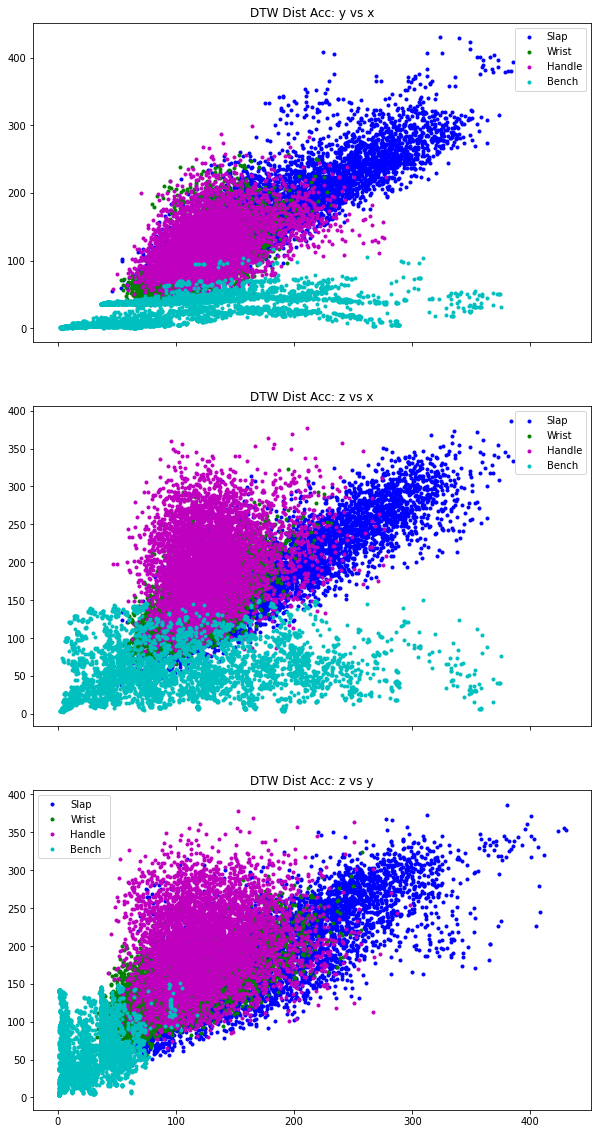

In [11]:
# Acc - Scatter plot of DTW dists
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [slap_accc[0], wrist_accc[0], handling_accc[0], bench_accc[0]]
y = [slap_accc[1], wrist_accc[1], handling_accc[1], bench_accc[1]]
z = [slap_accc[2], wrist_accc[2], handling_accc[2], bench_accc[2]]

xe = [slap_accstd[0], wrist_accstd[0], handling_accstd[0], bench_accstd[0]]
ye = [slap_accstd[1], wrist_accstd[1], handling_accstd[1], bench_accstd[1]]
ze = [slap_accstd[2], wrist_accstd[2], handling_accstd[2], bench_accstd[2]]

ax = axs[0]
ax.scatter(slap_accd[0], slap_accd[1], marker='.', c='b')
ax.scatter(wrist_accd[0], wrist_accd[1], marker='.', c='g')
ax.scatter(handling_accd[0], handling_accd[1], marker='.', c='m')
ax.scatter(bench_accd[0], bench_accd[1], marker='.', c='c')
# ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Acc: y vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[1]
ax.scatter(slap_accd[0], slap_accd[2], marker='.', c='b')
ax.scatter(wrist_accd[0], wrist_accd[2], marker='.', c='g')
ax.scatter(handling_accd[0], handling_accd[2], marker='.', c='m')
ax.scatter(bench_accd[0], bench_accd[2], marker='.', c='c')
# ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Acc: z vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[2]
ax.scatter(slap_accd[1], slap_accd[2], marker='.', c='b')
ax.scatter(wrist_accd[1], wrist_accd[2], marker='.', c='g')
ax.scatter(handling_accd[1], handling_accd[2], marker='.', c='m')
ax.scatter(bench_accd[1], bench_accd[2], marker='.', c='c')
# ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Acc: z vs y')
ax.legend(['Slap','Wrist','Handle','Bench'])

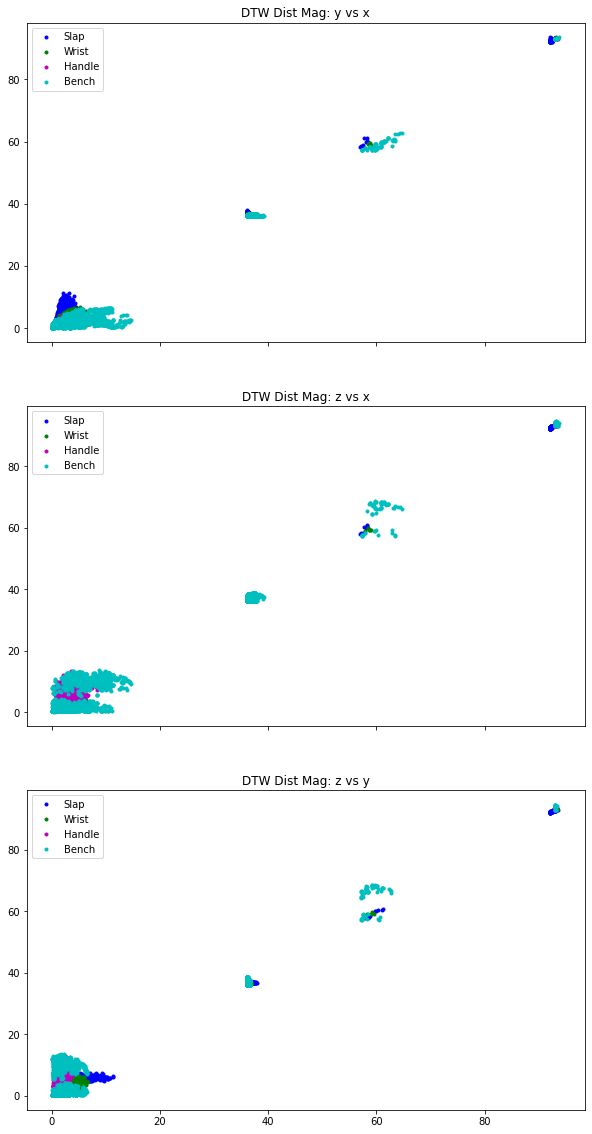

In [12]:
# Mag - Scatter plot of DTW dists
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [slap_magc[0], wrist_magc[0], handling_magc[0], bench_magc[0]]
y = [slap_magc[1], wrist_magc[1], handling_magc[1], bench_magc[1]]
z = [slap_magc[2], wrist_magc[2], handling_magc[2], bench_magc[2]]

xe = [slap_magstd[0], wrist_magstd[0], handling_magstd[0], bench_magstd[0]]
ye = [slap_magstd[1], wrist_magstd[1], handling_magstd[1], bench_magstd[1]]
ze = [slap_magstd[2], wrist_magstd[2], handling_magstd[2], bench_magstd[2]]

ax = axs[0]
ax.scatter(slap_magd[0], slap_magd[1], marker='.', c='b')
ax.scatter(wrist_magd[0], wrist_magd[1], marker='.', c='g')
ax.scatter(handling_magd[0], handling_magd[1], marker='.', c='m')
ax.scatter(bench_magd[0], bench_magd[1], marker='.', c='c')
# ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Mag: y vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[1]
ax.scatter(slap_magd[0], slap_magd[2], marker='.', c='b')
ax.scatter(wrist_magd[0], wrist_magd[2], marker='.', c='g')
ax.scatter(handling_magd[0], handling_magd[2], marker='.', c='m')
ax.scatter(bench_magd[0], bench_magd[2], marker='.', c='c')
# ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Mag: z vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[2]
ax.scatter(slap_magd[1], slap_magd[2], marker='.', c='b')
ax.scatter(wrist_magd[1], wrist_magd[2], marker='.', c='g')
ax.scatter(handling_magd[1], handling_magd[2], marker='.', c='m')
ax.scatter(bench_magd[1], bench_magd[2], marker='.', c='c')
# ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Mag: z vs y')
ax.legend(['Slap','Wrist','Handle','Bench'])

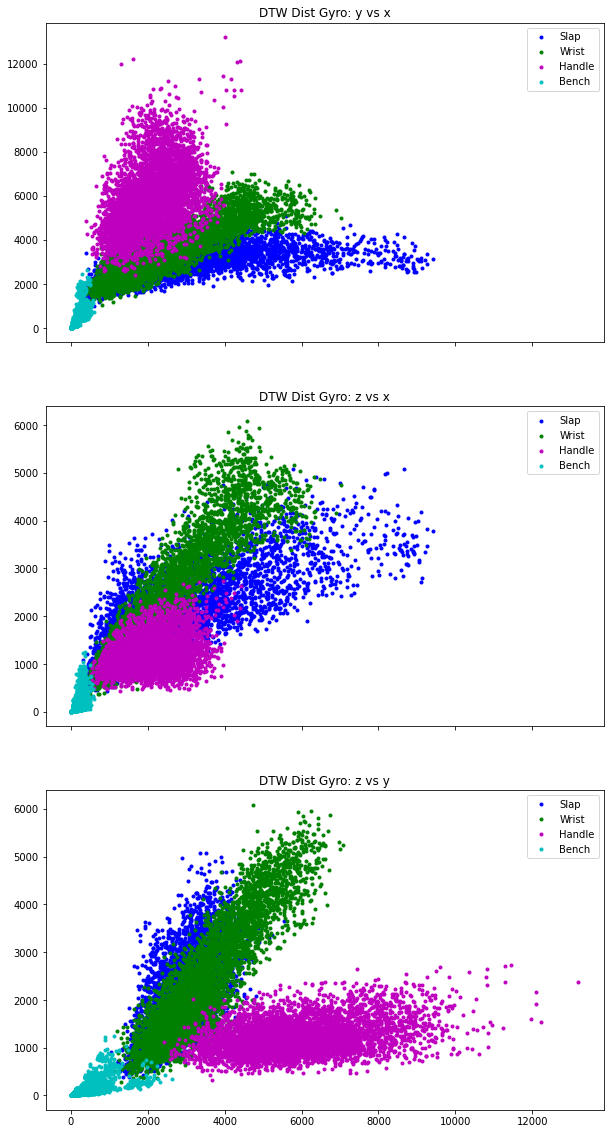

In [13]:
# Gyro - Scatter plot of DTW dists
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)

x = [slap_gyroc[0], wrist_gyroc[0], handling_gyroc[0], bench_gyroc[0]]
y = [slap_gyroc[1], wrist_gyroc[1], handling_gyroc[1], bench_gyroc[1]]
z = [slap_gyroc[2], wrist_gyroc[2], handling_gyroc[2], bench_gyroc[2]]

xe = [slap_gyrostd[0], wrist_gyrostd[0], handling_gyrostd[0], bench_gyrostd[0]]
ye = [slap_gyrostd[1], wrist_gyrostd[1], handling_gyrostd[1], bench_gyrostd[1]]
ze = [slap_gyrostd[2], wrist_gyrostd[2], handling_gyrostd[2], bench_gyrostd[2]]

ax = axs[0]
ax.scatter(slap_gyrod[0], slap_gyrod[1], marker='.', c='b')
ax.scatter(wrist_gyrod[0], wrist_gyrod[1], marker='.', c='g')
ax.scatter(handling_gyrod[0], handling_gyrod[1], marker='.', c='m')
ax.scatter(bench_gyrod[0], bench_gyrod[1], marker='.', c='c')
# ax.errorbar(x, y, xerr=xe, yerr=ye, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Gyro: y vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[1]
ax.scatter(slap_gyrod[0], slap_gyrod[2], marker='.', c='b')
ax.scatter(wrist_gyrod[0], wrist_gyrod[2], marker='.', c='g')
ax.scatter(handling_gyrod[0], handling_gyrod[2], marker='.', c='m')
ax.scatter(bench_gyrod[0], bench_gyrod[2], marker='.', c='c')
# ax.errorbar(x, z, xerr=xe, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Gyro: z vs x')
ax.legend(['Slap','Wrist','Handle','Bench'])

ax = axs[2]
ax.scatter(slap_gyrod[1], slap_gyrod[2], marker='.', c='b')
ax.scatter(wrist_gyrod[1], wrist_gyrod[2], marker='.', c='g')
ax.scatter(handling_gyrod[1], handling_gyrod[2], marker='.', c='m')
ax.scatter(bench_gyrod[1], bench_gyrod[2], marker='.', c='c')
# ax.errorbar(y, z, xerr=ye, yerr=ze, linestyle='None', ecolor='k', elinewidth=2)
ax.set_title('DTW Dist Gyro: z vs y')
ax.legend(['Slap','Wrist','Handle','Bench'])